In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12, 8)

df = pd.read_csv('calories.csv')

In [2]:
df.head()

,FoodCategory,FoodItem,per100grams,Cals_per100grams,KJ_per100grams
0,CannedFruit,Applesauce,100g,62 cal,260 kJ
1,CannedFruit,Canned Apricots,100g,48 cal,202 kJ
2,CannedFruit,Canned Blackberries,100g,92 cal,386 kJ
3,CannedFruit,Canned Blueberries,100g,88 cal,370 kJ
4,CannedFruit,Canned Cherries,100g,54 cal,227 kJ


In [3]:
for col in df.columns:
    percent_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, percent_missing))

FoodCategory - 0.0%
FoodItem - 0.0%
per100grams - 0.0%
Cals_per100grams - 0.0%
KJ_per100grams - 0.0%


In [4]:
df.dtypes

FoodCategory        object
FoodItem            object
per100grams         object
Cals_per100grams    object
KJ_per100grams      object
dtype: object

In [5]:
df['per100grams'] = 100

In [6]:
df

,FoodCategory,FoodItem,per100grams,Cals_per100grams,KJ_per100grams
0,CannedFruit,Applesauce,100,62 cal,260 kJ
1,CannedFruit,Canned Apricots,100,48 cal,202 kJ
2,CannedFruit,Canned Blackberries,100,92 cal,386 kJ
3,CannedFruit,Canned Blueberries,100,88 cal,370 kJ
4,CannedFruit,Canned Cherries,100,54 cal,227 kJ
...,...,...,...,...,...
2220,Spreads,Sunflower Butter,100,617 cal,2591 kJ
2221,Spreads,Tapenade,100,233 cal,979 kJ
2222,Spreads,Unsalted Butter,100,717 cal,3011 kJ
2223,Spreads,Vegemite,100,180 cal,756 kJ


In [7]:
df['Cals_per100grams'] = df['Cals_per100grams'].str[:-4].astype('int64')

In [8]:
df

,FoodCategory,FoodItem,per100grams,Cals_per100grams,KJ_per100grams
0,CannedFruit,Applesauce,100,62,260 kJ
1,CannedFruit,Canned Apricots,100,48,202 kJ
2,CannedFruit,Canned Blackberries,100,92,386 kJ
3,CannedFruit,Canned Blueberries,100,88,370 kJ
4,CannedFruit,Canned Cherries,100,54,227 kJ
...,...,...,...,...,...
2220,Spreads,Sunflower Butter,100,617,2591 kJ
2221,Spreads,Tapenade,100,233,979 kJ
2222,Spreads,Unsalted Butter,100,717,3011 kJ
2223,Spreads,Vegemite,100,180,756 kJ


In [9]:
df['KJ_per100grams'] = df['KJ_per100grams'].str[:-3].astype('int64')

In [10]:
df

,FoodCategory,FoodItem,per100grams,Cals_per100grams,KJ_per100grams
0,CannedFruit,Applesauce,100,62,260
1,CannedFruit,Canned Apricots,100,48,202
2,CannedFruit,Canned Blackberries,100,92,386
3,CannedFruit,Canned Blueberries,100,88,370
4,CannedFruit,Canned Cherries,100,54,227
...,...,...,...,...,...
2220,Spreads,Sunflower Butter,100,617,2591
2221,Spreads,Tapenade,100,233,979
2222,Spreads,Unsalted Butter,100,717,3011
2223,Spreads,Vegemite,100,180,756


In [11]:
df.dtypes

FoodCategory        object
FoodItem            object
per100grams          int64
Cals_per100grams     int64
KJ_per100grams       int64
dtype: object

In [12]:
df = df.sort_values(by = ['Cals_per100grams'], inplace = False, ascending = False)

In [13]:
# pd.set_option('display.max_rows', None)

# df.drop_duplicates()

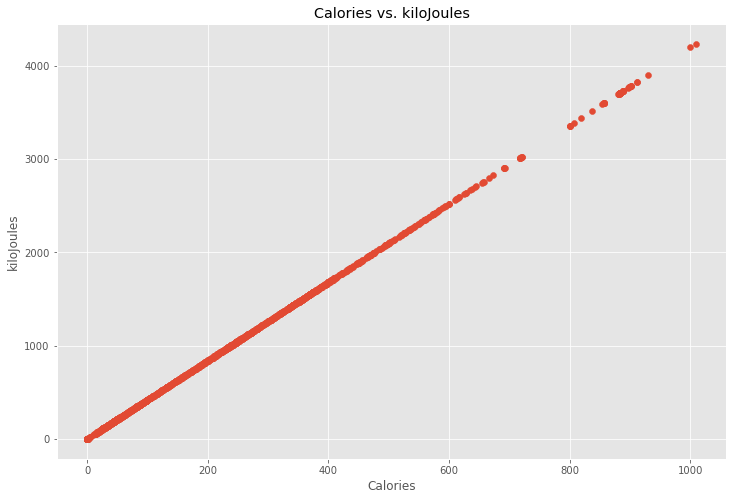

In [14]:
plt.scatter(x = df['Cals_per100grams'], y = df['KJ_per100grams'])

plt.title('Calories vs. kiloJoules')
plt.xlabel('Calories')
plt.ylabel('kiloJoules')

plt.show()

In [15]:
df.head()

,FoodCategory,FoodItem,per100grams,Cals_per100grams,KJ_per100grams
1621,Soups,Goulash,100,1009,4238
1751,Oils&Fats,Cod Liver Oil,100,1000,4200
1808,VegetableOils,Wheat Germ Oil,100,929,3902
1800,VegetableOils,Salmon Oil,100,911,3826
1789,VegetableOils,Menhaden Oil,100,911,3826


<AxesSubplot:xlabel='Cals_per100grams', ylabel='KJ_per100grams'>

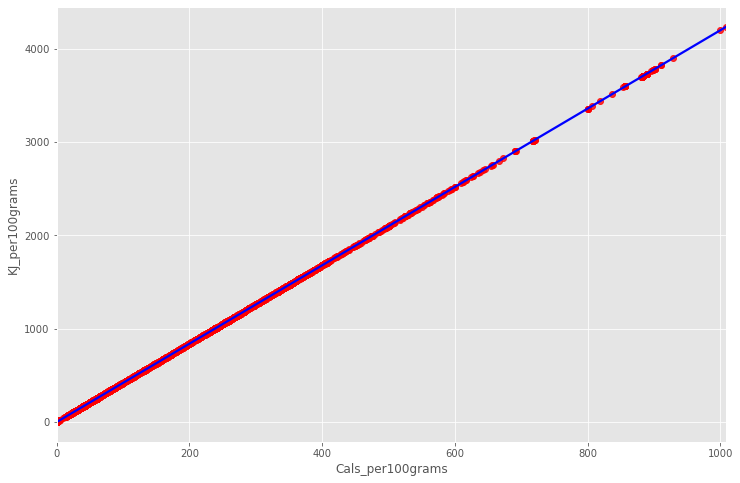

In [16]:
sns.regplot(x = 'Cals_per100grams', y = 'KJ_per100grams', data = df,
            scatter_kws = {"color": "red"}, line_kws = {"color": "blue"})

In [17]:
df.corr(method = 'pearson')

,per100grams,Cals_per100grams,KJ_per100grams
per100grams,NaN,NaN,NaN
Cals_per100grams,NaN,1.0,1.0
KJ_per100grams,NaN,1.0,1.0


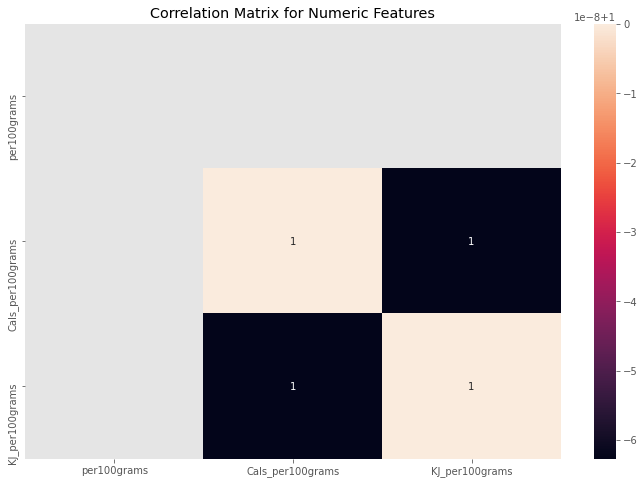

In [18]:
correlation_matrix = df.corr(method = 'pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title('Correlation Matrix for Numeric Features')

plt.show()

In [19]:
df.head()

,FoodCategory,FoodItem,per100grams,Cals_per100grams,KJ_per100grams
1621,Soups,Goulash,100,1009,4238
1751,Oils&Fats,Cod Liver Oil,100,1000,4200
1808,VegetableOils,Wheat Germ Oil,100,929,3902
1800,VegetableOils,Salmon Oil,100,911,3826
1789,VegetableOils,Menhaden Oil,100,911,3826


In [20]:
food_category_sum = df.groupby('FoodCategory')[["Cals_per100grams"]].sum()

food_category_sum_sorted = food_category_sum.sort_values(
    'Cals_per100grams', ascending = False)[:10]

food_category_sum_sorted

,Cals_per100grams
FoodCategory,
Candy&Sweets,34392
BakingIngredients,30796
Cakes&Pies,28993
VegetableOils,28887
"Oatmeal,Muesli&Cereals",28455
Oils&Fats,24593
"Pastries,Breads&Rolls",23341
Cheese,18165
Herbs&Spices,17501


In [21]:
food_category_avg = df.groupby('FoodCategory')[["Cals_per100grams"]].mean()

food_category_avg.head()

,Cals_per100grams
FoodCategory,
(Fruit)Juices,54.500000
AlcoholicDrinks&Beverages,207.937500
BakingIngredients,324.168421
Beef&Veal,237.102564
Beer,39.176471


<AxesSubplot:>

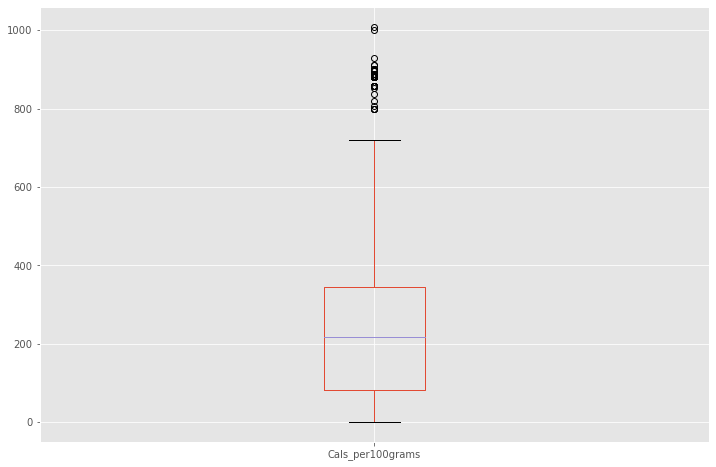

In [22]:
df.boxplot(column = ['Cals_per100grams'])

In [23]:
df.groupby('FoodCategory').filter(lambda x: 50 < x.FoodCategory.count())[['FoodCategory']].drop_duplicates().head()

,FoodCategory
1621,Soups
1898,BakingIngredients
2159,Sauces&Dressings
1678,Legumes
937,Candy&Sweets


In [24]:
above_average_categorical = df.groupby(['FoodCategory']).apply(lambda x: x[x['Cals_per100grams'] > x.Cals_per100grams.mean()])[['FoodItem', 'Cals_per100grams']]

In [25]:
above_average_categorical.sort_values(by = ['Cals_per100grams'], ascending = False)

FoodItem  Cals_per100grams
FoodCategory                                          
Soups           1621         Goulash              1009
Oils&Fats       1751   Cod Liver Oil              1000
VegetableOils   1808  Wheat Germ Oil               929
                1800      Salmon Oil               911
                1789    Menhaden Oil               911
...                              ...               ...
Soda&SoftDrinks 1308          Sprite                37
                1293      Ginger Ale                35
                1287      Five Alive                35
                1314     Tonic Water                35
                1273    Bitter Lemon                34

[1070 rows x 2 columns]

In [28]:
df.set_index('FoodItem').groupby('FoodCategory').apply(
    lambda x: x[x.Cals_per100grams > x.Cals_per100grams.mean()])[['Cals_per100grams']].sort_values(
    by = ['FoodCategory', 'FoodItem'])

Cals_per100grams
FoodCategory  FoodItem                                       
(Fruit)Juices Acai Juice                                   58
              Apricot Nectar                               56
              Clamato                                      60
              Coconut Milk                                233
              Concord Grape                                71
...                                                       ...
Yogurt        Yoplait Mixed Berry                         100
              Yoplait Pina Colada                         100
              Yoplait Strawberry                          100
              Yoplait Strawberry Banana                   100
              Yoplait Strawberry Cheesecake               100

[1070 rows x 1 columns]

In [29]:
df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized

,FoodCategory,FoodItem,per100grams,Cals_per100grams,KJ_per100grams
1621,36,812,100,1009,4238
1751,25,516,100,1000,4200
1808,39,1921,100,929,3902
1800,39,1557,100,911,3826
1789,39,1098,100,911,3826
...,...,...,...,...,...
1265,21,1787,100,0,0
1286,35,703,100,0,0
2010,16,913,100,0,0
1236,21,697,100,0,0


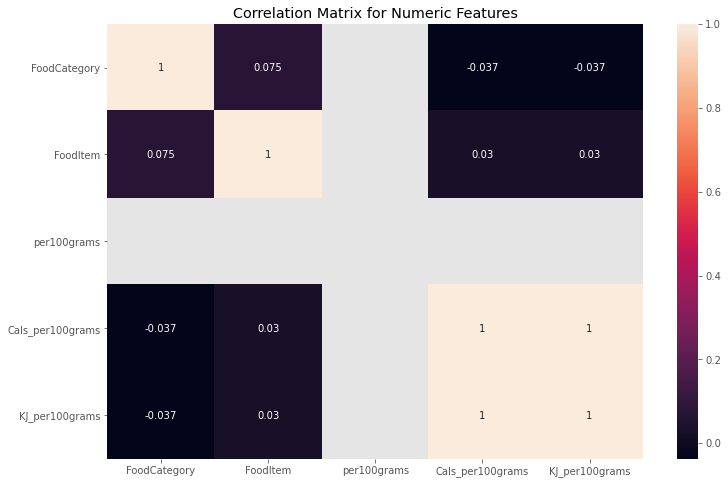

In [30]:
correlation_matrix = df.corr(method = 'pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title('Correlation Matrix for Numeric Features')

plt.show()

In [31]:
correlation_matrix = df_numerized.corr()

correlation_pairs = correlation_matrix.unstack()

correlation_pairs

FoodCategory      FoodCategory        1.000000
                  FoodItem            0.074831
                  per100grams              NaN
                  Cals_per100grams   -0.037379
                  KJ_per100grams     -0.037373
FoodItem          FoodCategory        0.074831
                  FoodItem            1.000000
                  per100grams              NaN
                  Cals_per100grams    0.030062
                  KJ_per100grams      0.030051
per100grams       FoodCategory             NaN
                  FoodItem                 NaN
                  per100grams              NaN
                  Cals_per100grams         NaN
                  KJ_per100grams           NaN
Cals_per100grams  FoodCategory       -0.037379
                  FoodItem            0.030062
                  per100grams              NaN
                  Cals_per100grams    1.000000
                  KJ_per100grams      1.000000
KJ_per100grams    FoodCategory       -0.037373
             